# Patent Value Indicators: Molten Salt Energy Storage 
This notebook will show how the data is handled and how the composite value indicator is made

In [1]:
# This cel imports the needed modules/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This is cel extracts the data from the excel file into a dataframe
patent_all_data_df = pd.read_excel('database_indicators.xlsx')

In [3]:
# Setting the big data df into a smaller one
patent_df = patent_all_data_df[['PN','FC']].copy()
patent_df.rename(columns = {'PN':'Patent Number(s)','FC':'Forward citations'}, inplace = True)
patent_df

,Patent Number(s),Forward citations
0,US2022228574-A1,0
1,US2019390660-A1; WO2019246369-A1; CA3104270-...,1
2,US2021180574-A1; US11225951-B2,0
3,US2016019993-A1; US9564251-B2,0
4,US10106753-B1,1
...,...,...
669,WO2017119671-A1; KR2017083488-A; IN201847029...,4
670,WO2017047521-A1; JP6152924-B1; TW201711959-A...,8
671,WO2021099538-A1; BE1027795-B1; TW202130824-A...,0
672,CA1264041-A; US4924897-A,5


In [4]:
# Calculating both the FC-score (Forward Citation score) and PF-score (Patent Family score)
temporary_PF_df = (patent_df['Patent Number(s)'].str.count(';')+1)
patent_df['PF score'] = temporary_PF_df/temporary_PF_df.max()
patent_df['FC score'] = patent_df[['Forward citations']]/patent_df['Forward citations'].max()

## Difference between indicators

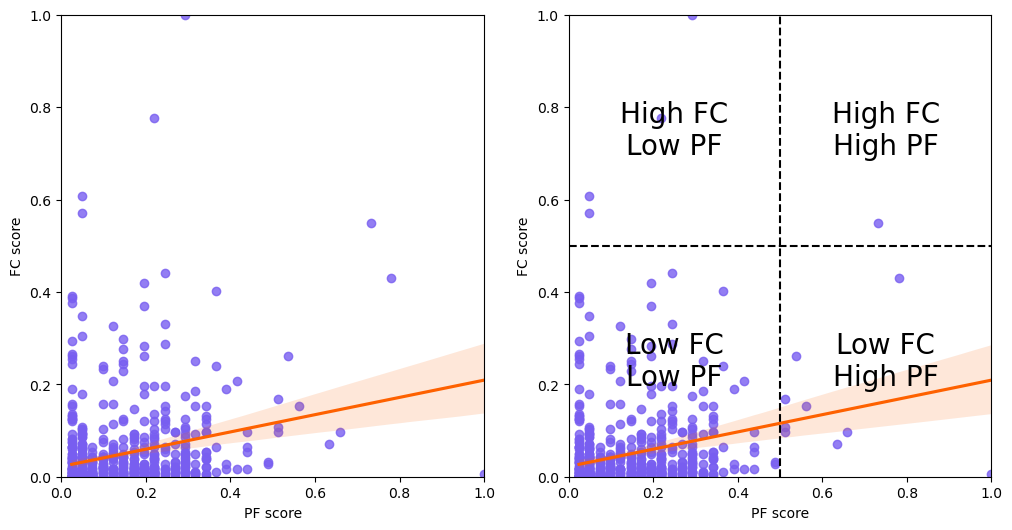

In [5]:
# setting a colorblind friendly palette
sns.set_palette(['#785EF0','#FE6100','#DC267F','#FFB000','#648FFF'])

fig1, axes1 = plt.subplots(1,2, sharex=True, figsize=(12,6))

sns.regplot(x=patent_df['PF score'],y=patent_df['FC score'],order=1,line_kws={"color": "C1"},ax=axes1[0]);
axes1[0].set_xlim([0,1])
axes1[0].set_ylim([0,1])
sns.regplot(x=patent_df['PF score'],y=patent_df['FC score'],order=1,line_kws={"color": "C1"},ax=axes1[1]);
axes1[1].set_xlim([0,1])
axes1[1].set_ylim([0,1])
axes1[1].axhline(0.5, linestyle='--',color= "#000000")
axes1[1].axvline(0.5, linestyle='--',color= "#000000")
#axes1[1].set_title("Correlation between indicator scores",y=1,fontweight="bold",fontsize=14)
axes1[1].annotate('High FC\nLow PF',xy=(0.25,0.75),fontsize=20,horizontalalignment='center', verticalalignment='center')
axes1[1].annotate('Low FC\nHigh PF',xy=(0.75,0.25),fontsize=20,horizontalalignment='center', verticalalignment='center')
axes1[1].annotate('High FC\nHigh PF',xy=(0.75,0.75),fontsize=20,horizontalalignment='center', verticalalignment='center')
axes1[1].annotate('Low FC\nLow PF',xy=(0.25,0.25),fontsize=20,horizontalalignment='center', verticalalignment='center')

fig1.savefig('correlation value indicators.png', dpi=432);

## Making the composite indicators

In [6]:
# Calculating the total composite value indicators

# The multiplication indicator
patent_df['FC-PF score MULTIPLICATION'] = patent_df['PF score']*patent_df['FC score']

# The equal sum indicator 
PF_factor = 0.5
FC_factor = 0.5

patent_df['FC-PF score EQUAL SUM'] = PF_factor*patent_df['PF score'] + FC_factor*patent_df['FC score']

# The weighted sum indicator in favor of PF
PF_factor = 0.6
FC_factor = 0.4

patent_df['FC-PF score PF WEIGHTED SUM'] = PF_factor*patent_df['PF score'] + FC_factor*patent_df['FC score']

# The weighted sum indicator in favor of FC
PF_factor = 0.4
FC_factor = 0.6

patent_df['FC-PF score FC WEIGHTED SUM'] = PF_factor*patent_df['PF score'] + FC_factor*patent_df['FC score']

In [7]:
# Sorting dataframe based on multiplication indicator
sorted_patent_df = patent_df.sort_values(by='FC-PF score MULTIPLICATION', ascending=False).reset_index(drop=True)
sorted_patent_df.head(10)

,Patent Number(s),Forward citations,PF score,FC score,FC-PF score MULTIPLICATION,FC-PF score EQUAL SUM,FC-PF score PF WEIGHTED SUM,FC-PF score FC WEIGHTED SUM
0,WO2010045097-A1; US2010101783-A1; US20101017...,101,0.731707,0.548913,0.401644,0.640310,0.658590,0.622031
1,WO2011058383-A2; WO2011058383-A3; US20122279...,79,0.780488,0.429348,0.335101,0.604918,0.640032,0.569804
2,DE3338009-A; GB2142135-A; US4504402-A; US45...,184,0.292683,1.000000,0.292683,0.646341,0.575610,0.717073
3,EP116809-A; AU8424666-A; JP59166642-A; BR84...,143,0.219512,0.777174,0.170599,0.498343,0.442577,0.554109
4,EP412021-A; JP3066786-A; JP3066787-A; JP306...,74,0.365854,0.402174,0.147137,0.384014,0.380382,0.387646
5,WO2009105643-A2; US2009211726-A1; KR20101166...,48,0.536585,0.260870,0.139979,0.398727,0.426299,0.371156
6,WO9605476-A1; AU9533229-A; US5553662-A; EP7...,81,0.243902,0.440217,0.107370,0.342060,0.322428,0.361691
7,WO2011104035-A2; DE102010009584-A1; WO201110...,44,0.365854,0.239130,0.087487,0.302492,0.315164,0.289820
8,GB2459955-A; WO2009138771-A2; WO2009138771-A...,31,0.512195,0.168478,0.086294,0.340337,0.374708,0.305965
9,EP99-A; DK7802597-A; NO7801971-A; FI7801830...,38,0.414634,0.206522,0.085631,0.310578,0.331389,0.289767


In [8]:
# For ease of comparison in a plot the scores are normalised to be in the range [0,1]
sorted_patent_df['FC-PF score MULTIPLICATION'] = sorted_patent_df['FC-PF score MULTIPLICATION']/sorted_patent_df['FC-PF score MULTIPLICATION'].max()
sorted_patent_df['FC-PF score EQUAL SUM'] = sorted_patent_df['FC-PF score EQUAL SUM']/sorted_patent_df['FC-PF score EQUAL SUM'].max()
sorted_patent_df['FC-PF score PF WEIGHTED SUM'] = sorted_patent_df['FC-PF score PF WEIGHTED SUM']/sorted_patent_df['FC-PF score PF WEIGHTED SUM'].max()
sorted_patent_df['FC-PF score FC WEIGHTED SUM'] = sorted_patent_df['FC-PF score FC WEIGHTED SUM']/sorted_patent_df['FC-PF score FC WEIGHTED SUM'].max()
sorted_patent_df.head(10)

,Patent Number(s),Forward citations,PF score,FC score,FC-PF score MULTIPLICATION,FC-PF score EQUAL SUM,FC-PF score PF WEIGHTED SUM,FC-PF score FC WEIGHTED SUM
0,WO2010045097-A1; US2010101783-A1; US20101017...,101,0.731707,0.548913,1.000000,0.990669,1.000000,0.867458
1,WO2011058383-A2; WO2011058383-A3; US20122279...,79,0.780488,0.429348,0.834323,0.935911,0.971822,0.794624
2,DE3338009-A; GB2142135-A; US4504402-A; US45...,184,0.292683,1.000000,0.728713,1.000000,0.874004,1.000000
3,EP116809-A; AU8424666-A; JP59166642-A; BR84...,143,0.219512,0.777174,0.424752,0.771021,0.672007,0.772737
4,EP412021-A; JP3066786-A; JP3066787-A; JP306...,74,0.365854,0.402174,0.366337,0.594135,0.577570,0.540594
5,WO2009105643-A2; US2009211726-A1; KR20101166...,48,0.536585,0.260870,0.348515,0.616899,0.647291,0.517598
6,WO9605476-A1; AU9533229-A; US5553662-A; EP7...,81,0.243902,0.440217,0.267327,0.529225,0.489574,0.504400
7,WO2011104035-A2; DE102010009584-A1; WO201110...,44,0.365854,0.239130,0.217822,0.468007,0.478544,0.404170
8,GB2459955-A; WO2009138771-A2; WO2009138771-A...,31,0.512195,0.168478,0.214851,0.526559,0.568956,0.426686
9,EP99-A; DK7802597-A; NO7801971-A; FI7801830...,38,0.414634,0.206522,0.213201,0.480517,0.503180,0.404096


## Comparing composite value indicators

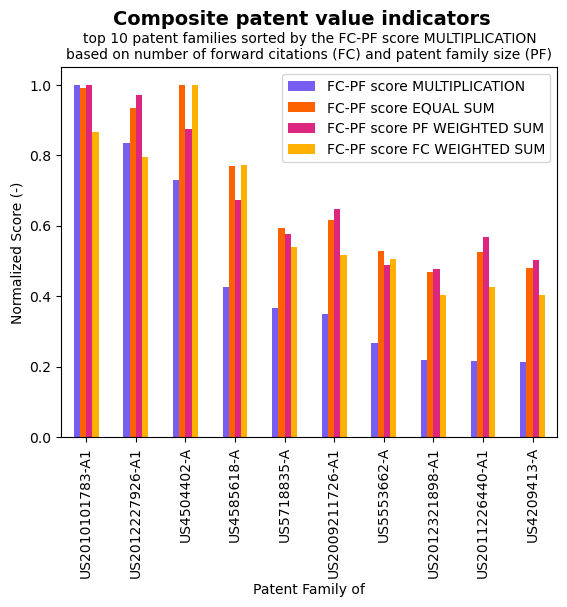

In [9]:
# Making a overview of the comparison of the different composite indicators
fig2, axes2 = plt.subplots(1,1)

sorted_patent_df.head(10).plot(y=["FC-PF score MULTIPLICATION", "FC-PF score EQUAL SUM", "FC-PF score PF WEIGHTED SUM","FC-PF score FC WEIGHTED SUM"], kind="bar", rot=0, ax=axes2)
axes2.set_xticks(ticks=[x for x in range(0,10)],labels=['US2010101783-A1','US2012227926-A1','US4504402-A','US4585618-A','US5718835-A','US2009211726-A1','US5553662-A','US2012321898-A1','US2011226440-A1','US4209413-A'],rotation = 90)
axes2.set_ylabel('Normalized Score (-)')
axes2.set_xlabel('Patent Family of')

plt.suptitle('Composite patent value indicators',y=1,fontweight="bold",fontsize=14)
plt.title('top 10 patent families sorted by the FC-PF score MULTIPLICATION\nbased on number of forward citations (FC) and patent family size (PF)',fontsize=10);

# Exporting figure
fig2.savefig('comparison composite value indicators.png', dpi=432);